-0.879969929382332
-0.08529928054100205


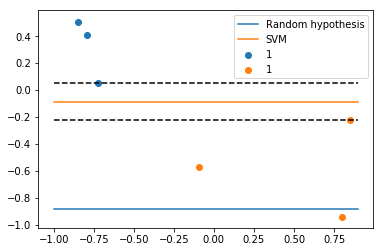

In [115]:
# Comparison of random hypothesis and Supper Vector Machine

from numpy.random import rand
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import pandas as pd
import numpy as np
import math 
import random

def generate_data():
    X1 = []
    X2 = []
    Y1 = []
    Y2 = []

    for i in range(3):
        X1.append(random.uniform(-1,1))
        Y1.append(random.uniform(0,1))
        X2.append(random.uniform(-1,1))
        Y2.append(random.uniform(-1,0))

    data1 = [np.array([X1[i],Y1[i],1]) for i in range(3)]
    data2 = [np.array([X2[i],Y2[i],-1]) for i in range(3)]

    # Dividing the data in upper half and lower half 
    return pd.DataFrame(data1), pd.DataFrame(data2)

upper_data, lower_data = generate_data()

# Introducing a for random hypothesis
a_ran = random.uniform(-1,1)
print(a_ran)

# Plotting datapoints and random hypothesis 
plt.scatter(upper_data.iloc[:,0],upper_data.iloc[:,1])
plt.scatter(lower_data.iloc[:,0],lower_data.iloc[:,1])     
X_val = np.arange(-1,1,0.1)
y_val = np.array(a_ran + 0*X_val)
plt.plot(X_val, y_val,label = "Random hypothesis")
plt.legend()


# Support Vector Machine 
# To get the svm classifier,  we need to find the closest point to x-axis in upper half and lower half.   
upper_y_value = upper_data.iloc[:,1]
lower_y_value = lower_data.iloc[:,1]
lowest = upper_y_value.loc[upper_y_value.idxmin()]
maximum = lower_y_value.loc[lower_y_value.idxmax()]

# SVM line would be the mid of those lowest points
a_svm = (lowest + maximum)/2
print(a_svm)

# Plotting Support Vector Machine
# plt.scatter(X1,Y1)
# plt.scatter(X2,Y2)   
     
x_val = np.arange(-1,1,0.1)
y_val = np.array(a_svm + 0*x_val)
y_upper_margin = np.array(lowest + 0*x_val)
y_lower_margin = np.array(maximum + 0*x_val)
plt.plot(x_val, y_val, label = "SVM")
plt.plot(x_val, y_upper_margin,'k--' )
plt.plot(x_val, y_lower_margin, 'k--')
plt.legend()


 



    



100000
100000


Text(0,0.5,'Frequency')

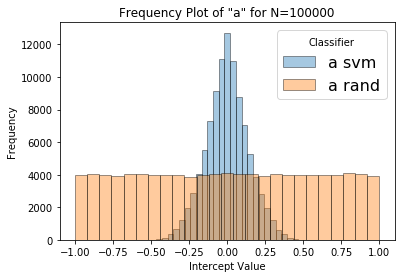

In [93]:
import seaborn as sns

# Generating the dataset for millions time  
N=1000000
a_svm=[]
for _ in range(N):
    upper_data, lower_data = generate_data()
    asvm = ( min(upper_data.iloc[:,1]) + max(lower_data.iloc[:,1]) ) / 2.0
    a_svm.append(asvm)
    
a_rand = np.random.uniform(-1,1,N) # You are generating N points between -1 and 1.

data = {"a svm" : a_svm, "a rand" : a_rand}
keys = ["a svm", "a rand"]

print(len(a_svm))
print(len(a_rand))

# the histogram of the data
for key in keys:
    # Subset to the airline
    subset = data[key]
    
    # Draw the density plot
    sns.distplot(subset, hist = True, kde = False,
                 hist_kws={'edgecolor':'black'},
                 label = key, bins=25)
    
# Plot formatting
plt.legend(prop={'size': 16}, title = 'Classifier')
plt.title('Frequency Plot of "a" for N=%s'%(N))
plt.xlabel('Intercept Value')
plt.ylabel('Frequency')

          0         1
0  0.071085  0.562233
1 -0.249853  0.702511
2  0.030357  0.819459
3 -0.678607 -0.248027
4 -0.219543 -0.132757
5  0.337165 -0.205387
0    1.0
1    1.0
2    1.0
3   -1.0
4   -1.0
5   -1.0
Name: 2, dtype: float64
[0.35510213 2.72854572]


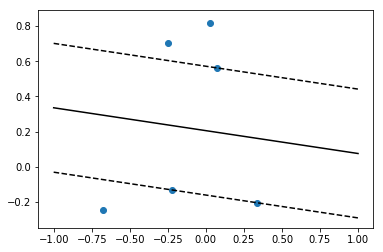

In [136]:
# If we do not draw from the given hypothesis H: sign(x2-a), then the SVM would find it's own weight and biased.
# as shown below


data = pd.DataFrame(data = data1+data2)
X1= data.iloc[:,0:2]
y= data.iloc[:,2]
print(X1)
print(y)

model = SVC(kernel='linear',C=1E10)
clf = model.fit(X1,y)
plt.scatter(data.iloc[:,0],data.iloc[:,1])

clf.support_vectors_
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-1, 1)
yy = a * xx - (clf.intercept_[0]) / w[1]

margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.show

print(w)
